## Dataset info

http://help.sentiment140.com/for-students/

```
The data is a CSV with emoticons removed. Data file format has 6 fields:
0 - the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
1 - the id of the tweet (2087)
2 - the date of the tweet (Sat May 16 23:58:44 UTC 2009)
3 - the query (lyx). If there is no query, then this value is NO_QUERY.
4 - the user that tweeted (robotickilldozr)
5 - the text of the tweet (Lyx is cool)
```

In [1]:
import csv

train_data = []
# with open('training.1600000.processed.noemoticon.csv') as csvfile:
with open('testdata.manual.2009.06.14.csv') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        newrow = [int(row[0]), row[5]]
        train_data.append(newrow)
        
# print(train_data) # won't work in jupyter due to amount of data

test_data = []
with open('testdata.manual.2009.06.14.csv') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        newrow = [int(row[0]), row[5]]
        test_data.append(newrow)
        
# print(test_data)

In [28]:
from nltk.tokenize import word_tokenize
import numpy as np
import functools
import operator

class NaiveBayes:
    
    def __init__(self, training_sets, labels):
        self.labels = labels
        self.k = len(self.labels)        
        self.likelihoods = []
        words = [ word_tokenize(training_text) for training_text in training_sets]
        word_count = sum(sum(len(word) for word in words) for words in words)
        for i in range(self.k):
            tmp = { word: (words[i].count(word) + 0.5) / len(words[i]) + 0.5 for word in words[i] }
            self.likelihoods.append(tmp)
        self.priors = [ len(words[i]) / word_count for i in range(self.k) ]
        
    def predict(self, input_text):
        probabilities = self._probabilities(input_text)
        best_index = np.argmax(probabilities)
        return self.labels[best_index]
        
    def _probabilities(self, text):
        words = word_tokenize(text)
        probabilities = []
        for i in range(self.k):
            probs_for_words = map(lambda word: self.likelihoods[i][word] if word in self.likelihoods[i] else np.finfo(np.float32).eps, words)
            prob_for_text = functools.reduce(operator.mul, probs_for_words, 1)
            probabilities.append(prob_for_text)
        return probabilities
        

In [29]:
# print(train_data)
    
positive = '\n'.join(list(map(lambda r: r[1], filter(lambda r: r[0] == 4, train_data))))
nonpositive = '\n'.join(list(map(lambda r: r[1], filter(lambda r: not r[0] == 4, train_data))))

# print(positive)
# print(nonpositive)
            

nb = NaiveBayes([positive, nonpositive], [1, 0])

[[315   1]
 [  1 181]]



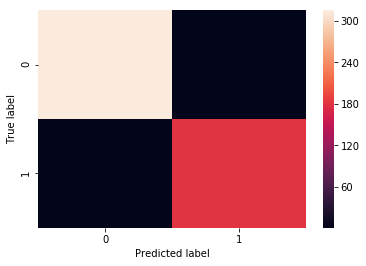

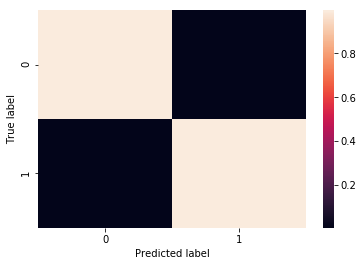

In [49]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

predictions = [ nb.predict(tweet[1]) for tweet in test_data ]
real_values = [ 1 if tweet[0] == 4 else 0 for tweet in test_data]
# print(predictions, real_values)

conf_mat=confusion_matrix(real_values, predictions)
print(conf_mat)

plt.figure()
sns.heatmap(conf_mat)
plt.ylabel('True label')
plt.xlabel('Predicted label')
 
plt.figure()
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)    
plt.ylabel('True label')
plt.xlabel('Predicted label')

print()

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(real_values,predictions)

0.9959839357429718